In [1]:
import numpy as np
import matplotlib.pyplot as plt
#117.023, 50.266


# Load data from file
data = np.loadtxt('sextractor/calib_red_20s.002.new.cat')

# Extract columns from the data
num = data[:,0]
x_pix = data[:, 1]
right_ascensions = data[:, 3]
decs = data[:, 4]
flux = data[:,5]

# Define masks for right ascensions and declinations
ra_mask = (right_ascensions < 117.026) & (right_ascensions > 117.02)
dec_mask = (decs < 50.27) & (decs > 50.26)

# Combine masks using logical AND
combined_mask = ra_mask & dec_mask

# Apply the combined mask to get the indices where the condition is True
indices = np.where(combined_mask)

# Extract the values based on the combined mask
filtered_x_pix = x_pix[indices]

# Print the filtered x_pix values
print(num[indices], filtered_x_pix)


[76.] [677.0757]


In [4]:
import os
import numpy as np

# Get a list of all files in the directory
file_list = os.listdir('sextractor')

# Filter and sort files numerically based on the number part before the extension
file_list = [file_name for file_name in file_list if file_name.startswith('calib_red_20s') and file_name.endswith('.cat')]
file_list.sort(key=lambda x: int(x.split('.')[-3].split('_')[-1]))

# Open the data file for writing
with open('ref2.dat', 'w') as f:
    # Iterate over each file in the directory
    for file_name in file_list:
        # Load data from file
        data = np.loadtxt(os.path.join('sextractor', file_name))

        # Extract columns from the data
        x_pix = data[:, 1]
        right_ascensions = data[:, 3]
        decs = data[:, 4]
        flux = data[:, 5]
        flux_err = data[:, 6]

        # Define masks for right ascensions and declinations
        ra_mask = (right_ascensions < 117.026) & (right_ascensions > 117.02)
        dec_mask = (decs < 50.27) & (decs > 50.26)

        # Combine masks using logical AND
        combined_mask = ra_mask & dec_mask

        # Apply the combined mask to get the indices where the condition is True
        indices = np.where(combined_mask)

        # Extract the values based on the combined mask
        xo_flux = flux[indices]
        xo_flux_err = flux_err[indices]

        # Stack flux and flux error horizontally
        stacked_data = np.column_stack((xo_flux, xo_flux_err))

        # Write the file name and the stacked data to the data file
        np.savetxt(f, stacked_data)


In [6]:
import os
import numpy as np

# Get a list of all files in the directory
file_list = os.listdir('sextractor')

# Filter and sort files numerically based on the number part before the extension
file_list = [file_name for file_name in file_list if file_name.startswith('calib_red_30s') and file_name.endswith('.cat')]
file_list.sort(key=lambda x: int(x.split('.')[-3].split('_')[-1]))

# Open the data file for writing
with open('ref2.dat2', 'w') as f:
    # Iterate over each file in the directory
    for file_name in file_list:
        # Load data from file
        data = np.loadtxt(os.path.join('sextractor', file_name))
        # Extract columns from the data
        x_pix = data[:, 1]
        right_ascensions = data[:, 3]
        decs = data[:, 4]
        flux = data[:, 5]
        flux_err = data[:, 6]

        # Define masks for right ascensions and declinations
        ra_mask = (right_ascensions < 117.026) & (right_ascensions > 117.02)
        dec_mask = (decs < 50.27) & (decs > 50.26)

        # Combine masks using logical AND
        combined_mask = ra_mask & dec_mask

        # Apply the combined mask to get the indices where the condition is True
        indices = np.where(combined_mask)

        # Extract the values based on the combined mask
        xo_flux = flux[indices]
        xo_flux_err = flux_err[indices]

        # Stack flux and flux error horizontally
        stacked_data = np.column_stack((xo_flux, xo_flux_err))

        # Write the file name and the stacked data to the data file
        np.savetxt(f, stacked_data)


Text(0.5, 1.0, 'REF2')

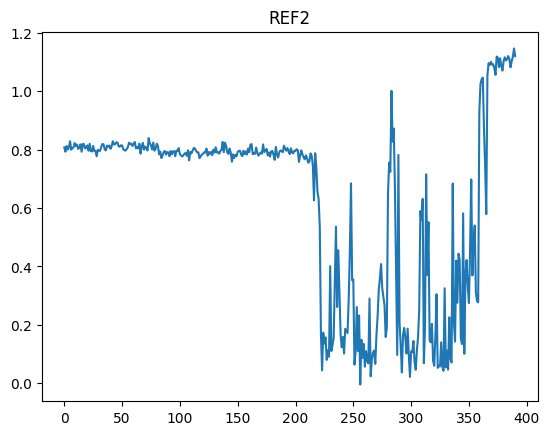

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('ref2.dat')

flux = data[:,0]

plt.plot(flux)
plt.title('REF2')